Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Problem Statement: 
Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow in Australia.

In [2]:
rain = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")


In [3]:
print(rain.head())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [4]:
print(rain.shape)


(8425, 23)


Data Preprocessing:
Real-world data is often messy, incomplete, unstructured, inconsistent, redundant, sprinkled with wacky values. So, without deploying any Data Preprocessing techniques, it is almost impossible to gain insights from raw data.

# What exactly is Data Preprocessing?

Data preprocessing is a process of converting raw data to a suitable format to extract insights. It is the first and foremost step in the Data Science life cycle. Data Preprocessing makes sure that data is clean, organize and read-to-feed to the Machine Learning model.

In [5]:
print(rain.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Dataset has two data types: float64, object
Except for the Date, Location columns, every column has missing values.
Let’s generate descriptive statistics for the dataset using the function describe() in pandas.

Descriptive Statistics: It is used to summarize and describe the features of data in a meaningful way to extract insights. It uses two types of statistic to describe or summarize data:

Measures of tendency
Measures of spread

In [6]:
print(rain.describe(exclude=[object]))


           MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000 

In [7]:
print(rain.describe(include=[object]))


              Date   Location WindGustDir WindDir9am WindDir3pm RainToday  \
count         8425       8425        7434       7596       8117      8185   
unique        3004         12          16         16         16         2   
top     2011-01-31  Melbourne           N          N         SE        No   
freq             5       1622         713        906        813      6195   

       RainTomorrow  
count          8186  
unique            2  
top              No  
freq           6195  


Finding Categorical and Numerical Features in a Data set:


In [9]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Cardinality check for Categorical features:


The accuracy, performance of a classifier not only depends on the model that we use, but also depends on how we preprocess data, and what kind of data you’re feeding to the classifier to learn.
Many Machine learning algorithms like Linear Regression, Logistic Regression, k-nearest neighbors, etc. can handle only numerical data, so encoding categorical data to numeric becomes a necessary step.  But before jumping into encoding, check the cardinality of each categorical feature.
Cardinality: The number of unique values in each categorical feature is known as cardinality.
A feature with a high number of distinct/ unique values is a high cardinality feature. A categorical feature with hundreds of zip codes is the best example of a high cardinality feature.
This high cardinality feature poses many serious problems like it will increase the number of dimensions of data when that feature is encoded. This is not good for the model.
There are many ways to handle high cardinality, one would be feature engineering and the other is simply dropping that feature if it doesn’t add any value to the model.
Let’s find the cardinality for Categorical features:

In [11]:
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.



In [12]:
rain['Date'] = pd.to_datetime(rain['Date'])
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [13]:
rain.drop('Date', axis = 1, inplace = True)
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Handling Missing values in Categorical Features:



In [14]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
rain[categorical_features].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [16]:
# Imputing the missing values in categorical features using the most frequent value which is mode:


In [17]:
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [18]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64

In [19]:
# Outlier Treatment to remove outliers from Numerical Features:

In [21]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

Now, numerical features are free from outliers. Let’s Impute missing values in numerical features using mean.



In [22]:
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

It’s time to do some analysis on each feature to understand about data and get some insights.

# Exploratory Data Analysis:

Exploratory Data Analysis(EDA) is a technique used to analyze, visualize, investigate, interpret, discover and summarize data. It helps Data Scientists to extract trends, patterns, and relationships in data.

1. Univariate Analysis:

a) Exploring target variable:

<AxesSubplot:>

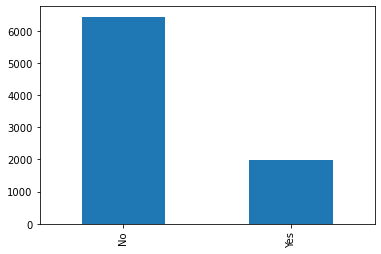

In [23]:
rain['RainTomorrow'].value_counts().plot(kind='bar')


Looks like the Target variable is imbalanced. It has more ‘No’ values. If data is imbalanced, then it might decrease the performance of the model. As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let me keep it as it is.

2. Bi-variate Analysis:

a) Sunshine vs Rainfall:

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

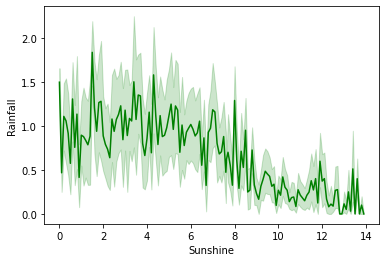

In [24]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='green')


In the above line plot, the Sunshine feature is inversely proportional to the Rainfall feature.

b) Sunshine vs Evaporation:

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

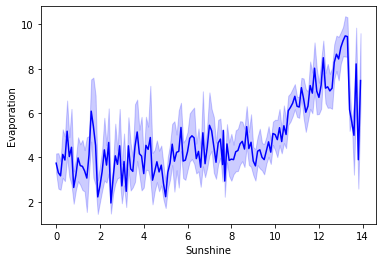

In [25]:
sns.lineplot(data=rain,x='Sunshine',y='Evaporation',color='blue')


In the above line plot, the Sunshine feature is proportional to the Evaporation feature.



# Correlation: 

<AxesSubplot:>

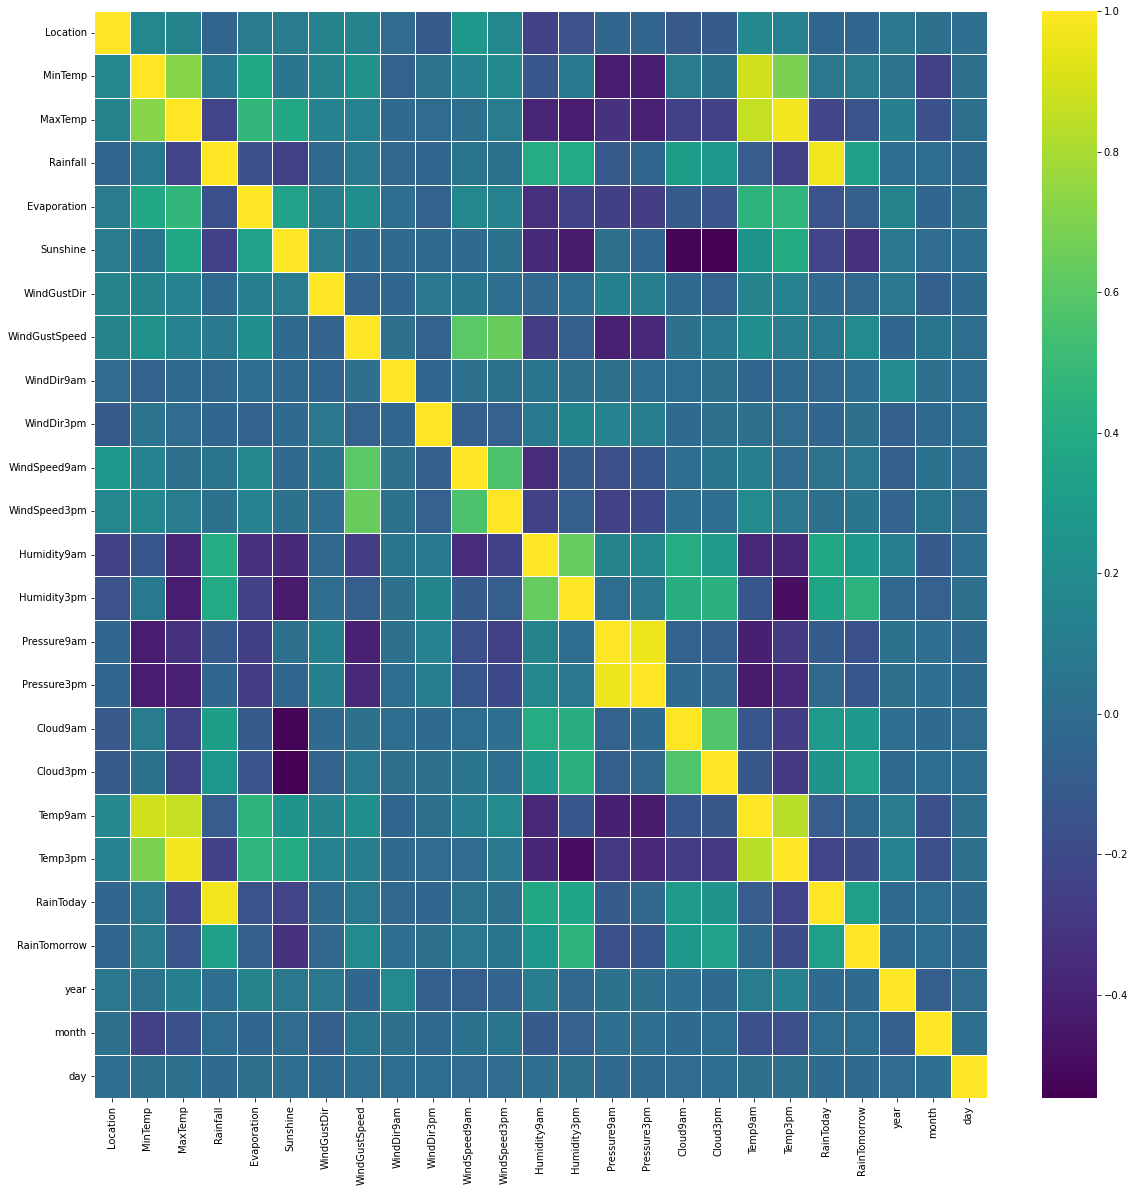

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

In [28]:
# Splitting data into Independent Features and Dependent Features:

X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_


array([0.02525588, 0.02754517, 0.02878517, 0.04264188, 0.02370495,
       0.03996708, 0.02965041, 0.05883236, 0.03138337, 0.03485217,
       0.03230727, 0.03533697, 0.04006834, 0.18242923, 0.02966456,
       0.03651809, 0.02824431, 0.06733108, 0.02711056, 0.02895213,
       0.05517227, 0.03027136, 0.02915467, 0.03482072])

<AxesSubplot:>

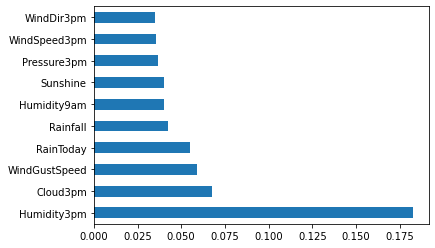

In [30]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

Splitting Data into training and testing set:


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [32]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 6740
Length of Testing Data: 1685


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [36]:
y_pred = classifier_logreg.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# Evaluating Model Performance:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8367952522255193


In [38]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8302670623145401
Test Data Score: 0.8367952522255193


# Receiver operating characteristic(ROC) curve:

The ROC curve is an evaluation metric used in binary classification problems to know the performance of the classifier.
It is a curve plotted between True Positive Rate(TPR) and False Positive Rate(FPR) at various thresholds.
ROC graph summarizes all the confusion matrices produced at different threshold values.
ROC curve is used to determine which threshold value is best for Logistic Regression in order to classify classes.

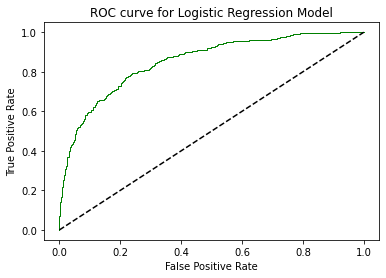

In [41]:
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [43]:
# Cross-Validation:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.82937685 0.83456973 0.83308605 0.83679525 0.81973294]
Average cross-validation score: 0.8307121661721067


# Results and Conclusion:


The logistic Regression model accuracy score is 0.84. The model does a very good job of predicting.
The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.
The mean accuracy score of cross-validation is almost the same as the original model accuracy score. So, the accuracy of the model may not be improved using Cross-validation.